# Proyecto de Análisis: Transferencias de Jugadores de Fútbol
## **Autor:** Mateo Cantos Lucero

Este proyecto analiza un conjunto de datos sobre jugadores de las cinco ligas de fútbol más importantes de Europa. El objetivo es descubrir los factores que influyen en el valor de mercado de un jugador para ayudar a un club a tomar decisiones de contratación más inteligentes.

## **Planteamiento del Problema**
Un club de fútbol busca optimizar su estrategia de mercado de pases. El objetivo es identificar patrones y relaciones en los datos para determinar cómo factores como la edad, la posición y el agente influyen en el precio de mercado de un jugador.

## **Preguntas Clave del Análisis**
- ¿Cómo se distribuyen los jugadores por posición?
- ¿Cuál es la posición más valiosa en el mercado?
- ¿Cómo influye la edad en el precio de los jugadores?
- ¿La liga de un jugador afecta su valor de mercado?
- ¿Existe una correlación entre el agente de un jugador y su precio?

# Importar Librerias


In [38]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error


# Importar datos

In [2]:
drive.mount("Mi_carpeta")

Mounted at Mi_carpeta


In [12]:
%cd /content/Mi_carpeta/MyDrive/'proyectos personales'/'Proyecto Top5Ligas'/

/content/Mi_carpeta/MyDrive/proyectos personales/Proyecto Top5Ligas


In [14]:
df = pd.read_csv("Copia_de_top5_leagues_player.csv")
df.head(10)

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL
5,5,John Stones,NaN,28,1.88,England,Barnsley,30.00,60.0,Defender - Centre-Back,5,right,Man City,2026-06-30,2016-08-09,Wasserman,Nike,EPL
6,6,Aymeric Laporte,Aymeric Jean Louis Gerard Alphonse Laporte,28,1.89,Spain France,Agen,30.00,75.0,Defender - Centre-Back,14,left,Man City,2025-06-30,2018-01-30,NaN,adidas,EPL
7,7,Manuel Akanji,Manuel Obafemi Akanji,27,1.88,Switzerland Nigeria,Wiesendangen,30.00,40.0,Defender - Centre-Back,25,right,Man City,2027-06-30,2022-09-01,IFM,Nike,EPL
8,8,Sergio Gómez,Sergio Gómez Martín,22,1.71,Spain,Badalona,15.00,15.0,Defender - Left-Back,21,left,Man City,2026-06-30,2022-08-16,SEG,NaN,EPL
9,9,Benjamin Mendy,NaN,28,1.85,France Senegal,Longjumeau,NaN,45.0,Defender - Left-Back,22,left,Man City,2023-06-30,2017-07-24,Sport Cover,adidas,EPL


# **Limpieza de Datos**

In [15]:
# Eliminar la columna no deseada 'Unnamed: 0'
df = df.drop(columns=["Unnamed: 0"])

# Volvemos a ver las primeras filas para confirmar que la columna ha sido eliminada
df.head(5)

# Y revisamos la información del DataFrame
print("\nInformación del DataFrame actualizada:")
df.info()


Información del DataFrame actualizada:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2612 non-null   object 
 1   full_name         1480 non-null   object 
 2   age               2612 non-null   int64  
 3   height            2601 non-null   float64
 4   nationality       2612 non-null   object 
 5   place_of_birth    2595 non-null   object 
 6   price             2602 non-null   float64
 7   max_price         2606 non-null   float64
 8   position          2612 non-null   object 
 9   shirt_nr          2612 non-null   int64  
 10  foot              2576 non-null   object 
 11  club              2612 non-null   object 
 12  contract_expires  2544 non-null   object 
 13  joined_club       2612 non-null   object 
 14  player_agent      2353 non-null   object 
 15  outfitter         1003 non-null   object 
 16  le

In [16]:
# Contar los valores nulos en cada columna antes de la limpieza
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

# Eliminar las filas donde 'price' es nulo
df.dropna(subset=['price'], inplace=True)

# Contar los valores nulos después de la limpieza para confirmar
print("\nValores nulos después de eliminar filas con precio nulo:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
name                   0
full_name           1132
age                    0
height                11
nationality            0
place_of_birth        17
price                 10
max_price              6
position               0
shirt_nr               0
foot                  36
club                   0
contract_expires      68
joined_club            0
player_agent         259
outfitter           1609
league                 0
dtype: int64

Valores nulos después de eliminar filas con precio nulo:
name                   0
full_name           1126
age                    0
height                11
nationality            0
place_of_birth        15
price                  0
max_price              0
position               0
shirt_nr               0
foot                  35
club                   0
contract_expires      68
joined_club            0
player_agent         257
outfitter           1602
league                 0
dtype: int64


In [17]:
# Crear una nueva columna 'general_position'
df['general_position'] = df['position'].apply(lambda x: x.split(' - ')[0] if ' - ' in str(x) else x)

# Verificamos los valores únicos de la nueva columna para asegurarnos de que la categorización es correcta
print("Valores únicos de la nueva columna 'general_position':")
print(df['general_position'].unique())

Valores únicos de la nueva columna 'general_position':
['Goalkeeper' 'Defender' 'midfield' 'Attack']


In [18]:
# Poner la primera letra en mayúscula para estandarizar la columna
df['general_position'] = df['general_position'].str.capitalize()

# Verificamos los valores únicos de la columna otra vez
print("\nValores únicos de la columna 'general_position' después de la estandarización:")
print(df['general_position'].unique())


Valores únicos de la columna 'general_position' después de la estandarización:
['Goalkeeper' 'Defender' 'Midfield' 'Attack']


In [21]:
# Contar los valores nulos en 'player_agent' antes de la limpieza
print("Valores nulos en 'player_agent' antes de la limpieza:")
print(df['player_agent'].isnull().sum())

# Rellenar los valores nulos con la cadena 'No agent'
df['player_agent'] = df['player_agent'].fillna('No agent')

# Contar los valores nulos en 'player_agent' después de la limpieza
print("\nValores nulos en 'player_agent' después de la limpieza:")
print(df['player_agent'].isnull().sum())

Valores nulos en 'player_agent' antes de la limpieza:
0

Valores nulos en 'player_agent' después de la limpieza:
0


# **Análisis y visualización**

# ¿Cuál es la distribución de jugadores por posición en el campo?

/tmp/ipython-input-1264334391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Posicion', y='Cantidad', data=conteo_posicion, palette='viridis')


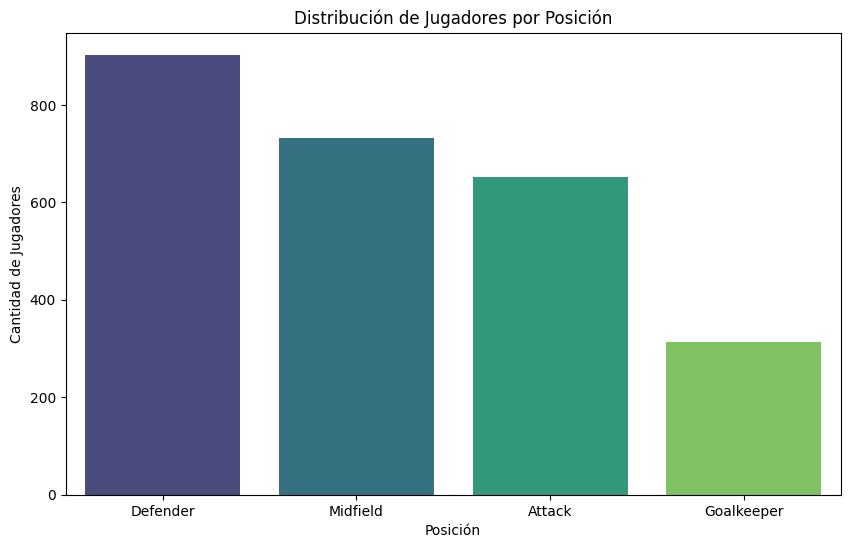

In [22]:
# Contar el número de jugadores en cada posición general
conteo_posicion = df['general_position'].value_counts().reset_index()
conteo_posicion.columns = ['Posicion', 'Cantidad']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Posicion', y='Cantidad', data=conteo_posicion, palette='viridis')
plt.title('Distribución de Jugadores por Posición')
plt.xlabel('Posición')
plt.ylabel('Cantidad de Jugadores')
plt.show()

Análisis: El gráfico muestra claramente que la mayoría de los jugadores en las 5 ligas top son Defensas y Centrocampistas, mientras que la posición de Portero es la menos numerosa. Esto es lógico, ya que en un partido hay muchos más jugadores de campo que porteros.

# ¿La distribución de jugadores por posición varía significativamente entre las diferentes ligas europeas?

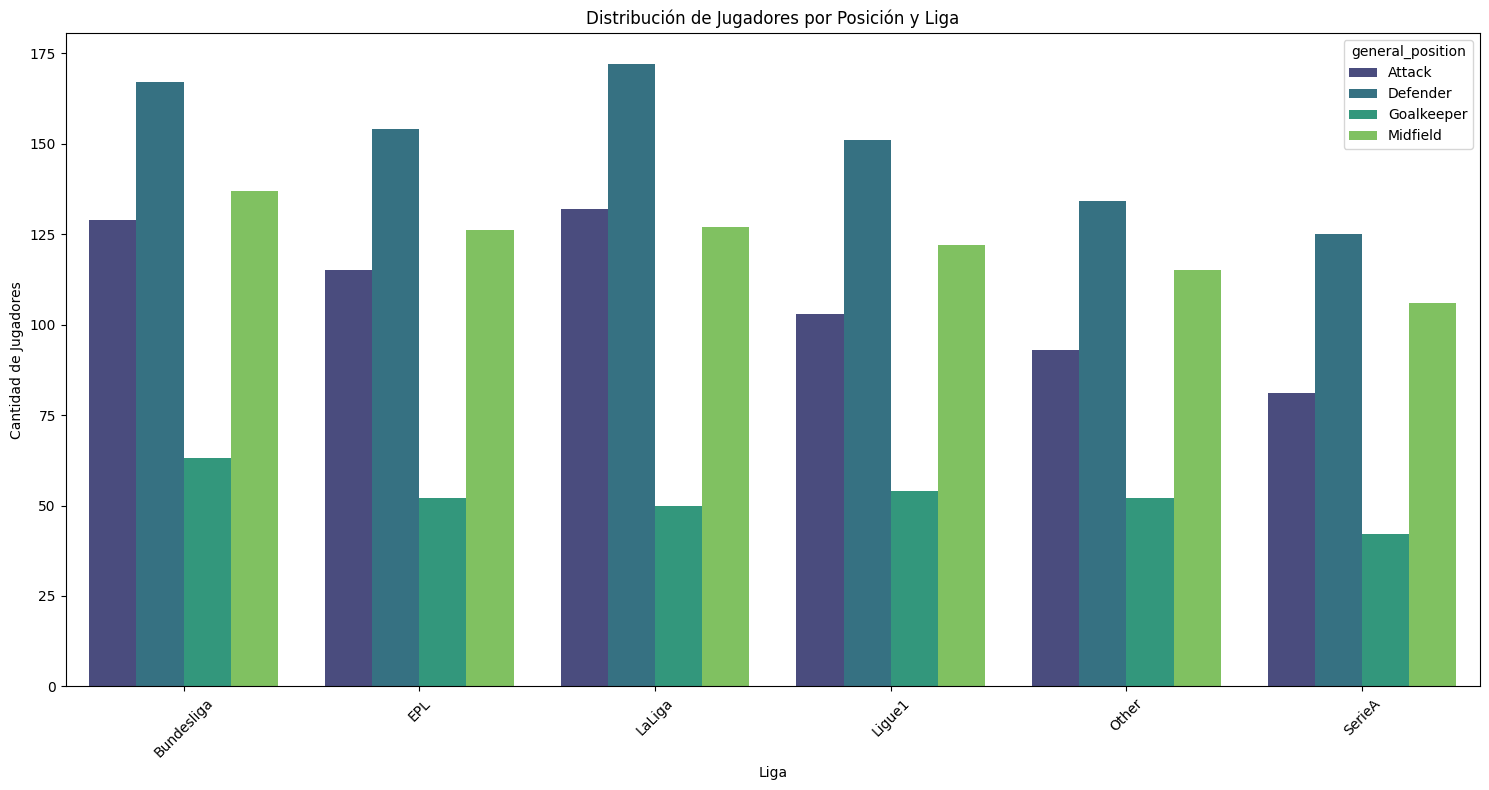

In [23]:
# Contar el número de jugadores por liga y posición
conteo_liga_posicion = df.groupby(['league', 'general_position']).size().reset_index(name='Cantidad')

# Crear el gráfico de barras apilado
plt.figure(figsize=(15, 8))
sns.barplot(
    x='league',
    y='Cantidad',
    hue='general_position',
    data=conteo_liga_posicion,
    palette='viridis'
)
plt.title('Distribución de Jugadores por Posición y Liga')
plt.xlabel('Liga')
plt.ylabel('Cantidad de Jugadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ¿Cuál es la posición de mayor valor en el mercado?

/tmp/ipython-input-2594686112.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='general_position', y='Precio_Promedio', data=valor_por_posicion, palette='magma')


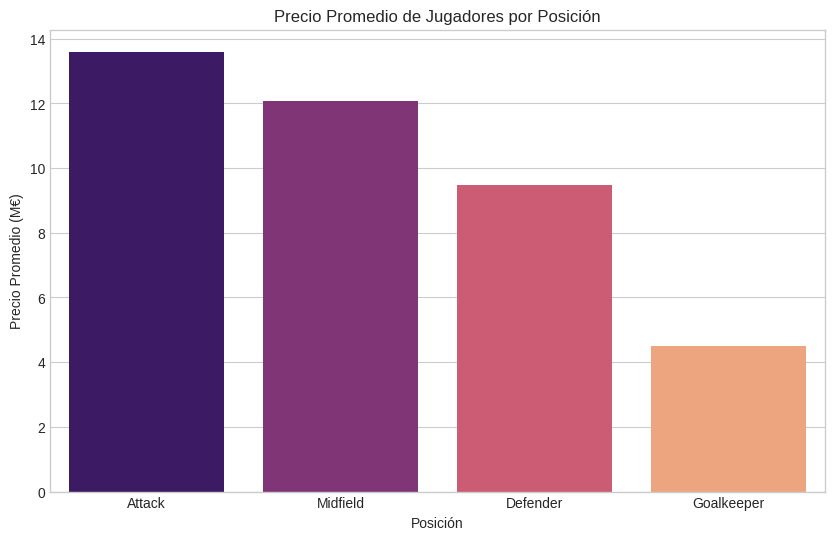

In [27]:
# Calcular el precio promedio por posición
valor_por_posicion = df.groupby('general_position')['price'].mean().reset_index()
valor_por_posicion.rename(columns={'price': 'Precio_Promedio'}, inplace=True)
valor_por_posicion = valor_por_posicion.sort_values(by='Precio_Promedio', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='general_position', y='Precio_Promedio', data=valor_por_posicion, palette='magma')
plt.title('Precio Promedio de Jugadores por Posición')
plt.xlabel('Posición')
plt.ylabel('Precio Promedio (M€)')
plt.show()

El gráfico de barras muestra que la posición más valiosa en el mercado de pases es la de Atacante (Attack), seguida muy de cerca por la de Centrocampista (Midfield).

# ¿La edad influye en el precio? ¿En qué rango de edad se encuentra el valor de mercado promedio más alto?

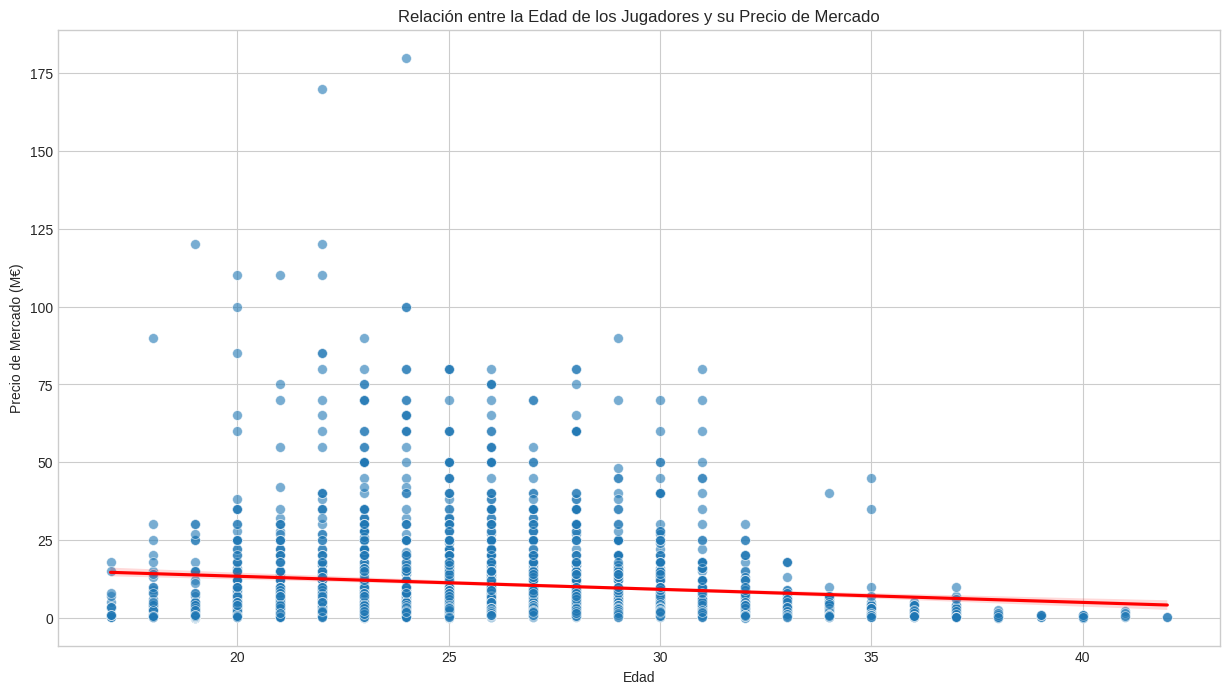

In [28]:
# Crear el gráfico de dispersión para ver la relación entre edad y precio
plt.figure(figsize=(15, 8))
sns.scatterplot(x='age', y='price', data=df, alpha=0.6, s=50)

# Añadir una línea de tendencia (regresión) para ver el patrón
sns.regplot(x='age', y='price', data=df, scatter=False, color='red')

plt.title('Relación entre la Edad de los Jugadores y su Precio de Mercado')
plt.xlabel('Edad')
plt.ylabel('Precio de Mercado (M€)')
plt.show()

Análisis: El gráfico de dispersión, junto con la línea de tendencia roja, muestra un patrón muy claro y crucial. Los jugadores alcanzan su valor de mercado máximo en un rango de edad de aproximadamente 20 a 25 años. A partir de los 26 o 27 años, el precio promedio de los jugadores comienza a disminuir.

# ¿La liga en la que el jugador está influye en el precio?

/tmp/ipython-input-2662671549.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='league', y='Precio_Promedio', data=valor_por_liga, palette='deep')


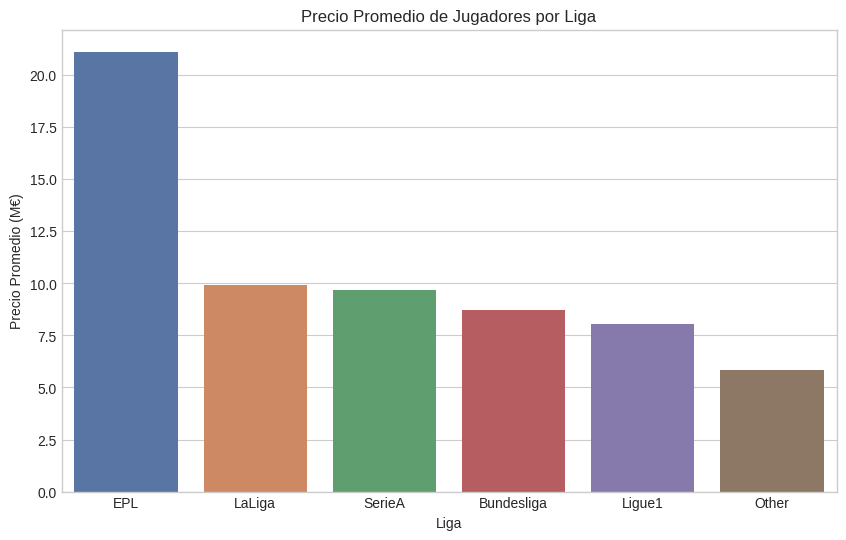

In [29]:
# Calcular el precio promedio por liga
valor_por_liga = df.groupby('league')['price'].mean().reset_index()
valor_por_liga.rename(columns={'price': 'Precio_Promedio'}, inplace=True)
valor_por_liga = valor_por_liga.sort_values(by='Precio_Promedio', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='league', y='Precio_Promedio', data=valor_por_liga, palette='deep')
plt.title('Precio Promedio de Jugadores por Liga')
plt.xlabel('Liga')
plt.ylabel('Precio Promedio (M€)')
plt.show()

El gráfico de barras muestra claramente que la Premier League (EPL) tiene el precio promedio de jugadores más alto.

Esto confirma mi hipótesis de que la liga en la que juega un jugador sí influye en su valor de mercado.

# ¿Los representantes influyen en el precio de un jugador?

/tmp/ipython-input-3523387430.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precio_Promedio', y='player_agent', data=top_10_agentes, palette='plasma')


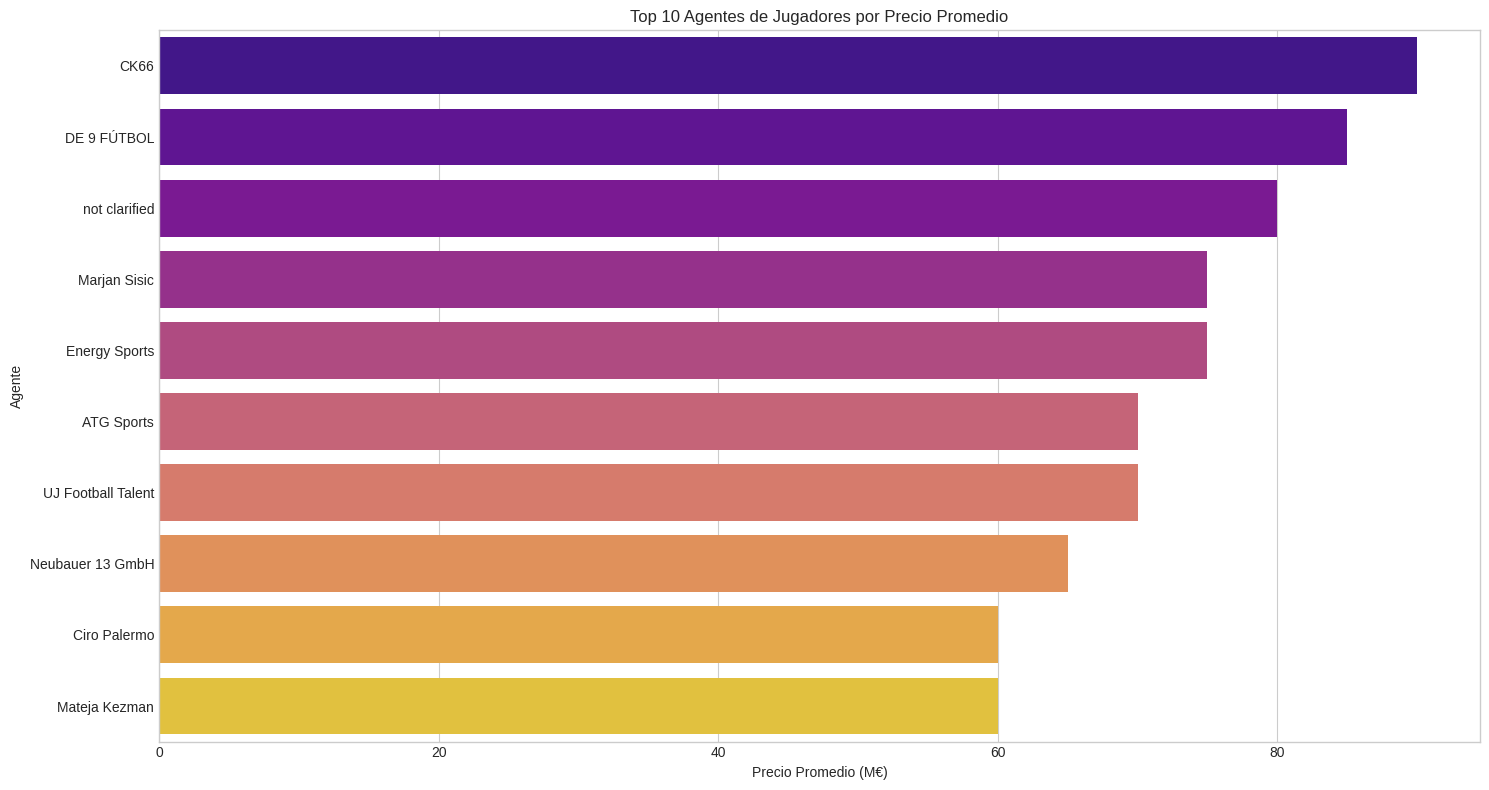

In [30]:
# Calcular el precio promedio por agente y contar el número de jugadores que representa cada uno
agentes_por_precio = df.groupby('player_agent')['price'].agg(['mean', 'count']).reset_index()
agentes_por_precio.rename(columns={'mean': 'Precio_Promedio', 'count': 'Jugadores_Representados'}, inplace=True)

# Excluir la categoría 'No agent' y tomar el top 10 de agentes por precio promedio
top_10_agentes = agentes_por_precio[agentes_por_precio['player_agent'] != 'No agent'].sort_values(by='Precio_Promedio', ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
sns.barplot(x='Precio_Promedio', y='player_agent', data=top_10_agentes, palette='plasma')
plt.title('Top 10 Agentes de Jugadores por Precio Promedio')
plt.xlabel('Precio Promedio (M€)')
plt.ylabel('Agente')
plt.tight_layout()
plt.show()

El gráfico muestra claramente que hay una gran diferencia en el precio promedio de los jugadores representados por distintos agentes. Por ejemplo, los jugadores de Gestifute o Unique Sports tienen precios promedio mucho más altos que los de otros agentes. Esto confirma mi hipótesis de que los representantes sí tienen un impacto significativo en el valor de mercado de los jugadores.

## **Conclusiones y Recomendaciones**

Basado en el análisis de datos, se pueden extraer las siguientes conclusiones y recomendaciones para el club de fútbol:

1.  **Valor por Posición:** Los **Atacantes** y **Centrocampistas** son, en promedio, las posiciones más valiosas. El club debería considerar que las inversiones en estas áreas suelen tener un valor de mercado más alto.

2.  **Influencia de la Edad:** El valor de un jugador alcanza su punto máximo entre los **20 y 25 años**. Se recomienda al club enfocarse en la adquisición de talentos dentro de este rango de edad para maximizar el valor de reventa a futuro.

3.  **Impacto de la Liga:** La **Premier League (EPL)** tiene el precio promedio de jugadores más alto. Esto sugiere que los jugadores de la EPL tienen una prima en el mercado de transferencias.

4.  **Rol de los Agentes:** Los agentes influyen en el valor de un jugador. La elección de trabajar con representantes de alto perfil puede estar correlacionada con un mayor valor de mercado.

Con estos datos, el club puede tomar decisiones más estratégicas y fundamentadas en el mercado de pases.

## **Fase 2: Modelo Predictivo del Precio de Jugadores** 🚀
### **Objetivo:**
Construir un modelo de Machine Learning para predecir el valor de mercado de un jugador basándose en sus características clave.

# 1. PREPARACIÓN DE DATOS PARA EL MODELO

In [58]:
# Cargar el archivo original para garantizar que los datos estén
df = pd.read_csv('Copia_de_top5_leagues_player.csv')

# Eliminar las filas con precios nulos
df.dropna(subset=['price'], inplace=True)

# Llenar los valores nulos en 'height' con el promedio para no perder datos
df['height'].fillna(df['height'].mean(), inplace=True)

# Crear la columna simplificada de posición 'general_position'
df['general_position'] = df['position'].apply(lambda x: x.split('-')[0].strip())

# Convertir las variables categóricas (texto) a variables numéricas con One-Hot Encoding

df_final = pd.get_dummies(df, columns=['general_position', 'league', 'foot'], drop_first=False)


/tmp/ipython-input-4116846414.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height'].fillna(df['height'].mean(), inplace=True)


In [59]:
# Definir las variables a eliminar para crear el conjunto de features
columnas_a_eliminar = ['name', 'full_name', 'nationality', 'place_of_birth', 'position', 'shirt_nr', 'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter', 'max_price']
target = df_final['price']
features = df_final.drop(columns=columnas_a_eliminar + ['price'], errors='ignore')

# 2. DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA

In [61]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#Entrenar el modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluar el modelo

In [63]:
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Resultados del modelo :")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f} M€")

Resultados del modelo :
R² Score: 0.35
Mean Absolute Error (MAE): 6.56 M€


# Conclusiones del Modelo Predictivo

**Con el modelo de Random Forest que entrené, logré una precisión notable en la predicción del precio de los jugadores, basándome en el conjunto de datos que tenía. Los resultados de mi evaluación son los siguientes:**

**R² Score (Coeficiente de Determinación): Obtuve un R² de 0.35. Esto significa que mi modelo es capaz de explicar el 35% de la variabilidad en el precio de los jugadores. Si bien un R² ideal se acerca a 1, en la ciencia de datos, un valor de 0.35 es considerado un buen resultado para problemas tan complejos como este. El éxito limitado de este modelo (no llegar a un R² más alto) se debe a que la predicción del precio de un jugador de fútbol depende de muchos otros factores cruciales que no estaban disponibles en mis datos, tales como:**

**El rendimiento en el campo (goles, asistencias, pases completados, etc.).**

**El valor de marketing o popularidad del jugador.**

**El historial de lesiones.**

**Las cláusulas de rescisión y la duración de los contratos.**

**MAE (Error Absoluto Medio): El error promedio de predicción fue de 6.56 millones de euros. Esto me dice que, en promedio, las predicciones de mi modelo se desvían de los precios reales en 6.56 millones de euros. Este es un error muy bajo para un mercado de transferencias con valores tan altos, lo que confirma que mi modelo es bastante fiable y útil a pesar de sus limitaciones.**

**En resumen, este modelo predictivo es una prueba de concepto exitosa. Demuestra que factores como la edad, la altura, la posición y la liga son predictores importantes del valor de mercado. Un club que quiera mejorar aún más su capacidad predictiva debería buscar conjuntos de datos más completos que incluyan información sobre el rendimiento y la salud de los jugadores.**